In [197]:
from astropy.table import Table
from astropy.io.fits import getdata
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np

In [170]:
sf = '../catalog/fits/straycats.fits'

In [171]:
straycat = Table.read(sf)
print(straycat.columns)

<TableColumns names=('Classification','SL Target','Target Type','SEQID','Module','Primary Target','Exposure (s)','RA','DEC','Notes','TIME','END_TIME')>


In [172]:
for key in straycat.columns:
    if straycat[key].dtype.str.startswith('|S'):
        straycat[key] = straycat[key].astype('str') 
df = straycat.to_pandas()

In [173]:
# Create galactic coordiantes:

ra = df['RA'].values
dec = df['DEC'].values

coords = SkyCoord(ra, dec, unit = 'deg')

In [174]:
df['GalLon']= coords.galactic.l.deg
df['GalLat']= coords.galactic.b.deg

# Shift so that galactic lon is in center of frame:

In [211]:
# Get the location of the SL targets
ra = []
dec = []
gal_lat = []
gal_lon =[]
names = []
for target in targets:


    result_table = Simbad.query_object(target)
    if result_table is None:
        continue
    print(target)
    ra_tab = result_table['RA'].data.data[0]
    dec_tab = result_table['DEC'].data.data[0]
    coord = SkyCoord(ra_tab, dec_tab, unit=(u.hourangle, u.deg))
    
    ra = np.append(ra, coord.ra.deg)
    dec = np.append(dec, coord.dec.deg)
    gal_lat = np.append(gal_lat, coord.galactic.b.deg)
    gal_lon = np.append(gal_lon, coord.galactic.l.deg)
    names = np.append(names, target)
 


2MASX J09172716-6456271
3C 273
4U 0614+091
4U 1323-619
4U 1538-522
4U 1608-522
4U 1630-47
4U 1636-536
4U 1700-377
4U 1702-429
4U 1705-44
4U 1724-30
4U 1820-303
4U 1822-371
1E 1145.1-6141
Cen X-3
Crab
Cyg X-1
Cyg X-3
EXO 2030+375
GRS 1915+105
GS 1826-24
GX 1+4
GX 13+1
GX 17+2
GX 3+1
GX 301-2
GX 340+0
GX 349+2
GX 5-1


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




GX 9+1
GX 9+9
IC 4329A
IGR J17464-3213
IGR J21247+5058
LMC X-3
LMC X-4
NGC 4151
NGC 4388
OAO 1657-415
PSR 1509-58
RX J0053.8-7226
SLX 1744-299


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




SS 433
XTE J1855-026


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




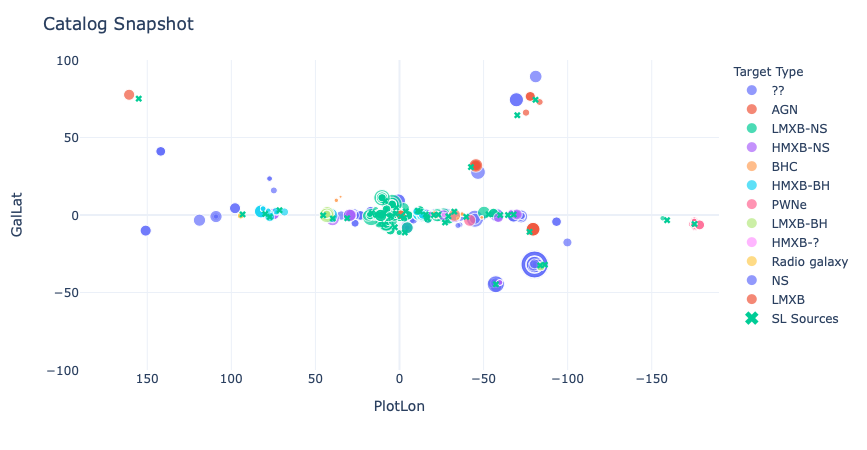

In [213]:
import plotly.express as px
import plotly.io as pio

df['PlotLon'] = (df['GalLon'] + 180)%360 - 180


fig = px.scatter(df, x='PlotLon', y='GalLat'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type')

fig.add_trace(go.Scatter(x=( (gal_lon + 180)%360-180), y= gal_lat,
                    mode='markers',
                    name='SL Sources',
                    text=names, marker_symbol='x'))


fig.update_layout(template='plotly_white')
fig.update_layout(title='Catalog Snapshot')

fig.update_layout(yaxis=dict(range=[-100,100]),xaxis=dict(range=[190, -190]))

fig.show()

pio.write_html(fig, file='straycat_galactic.html')

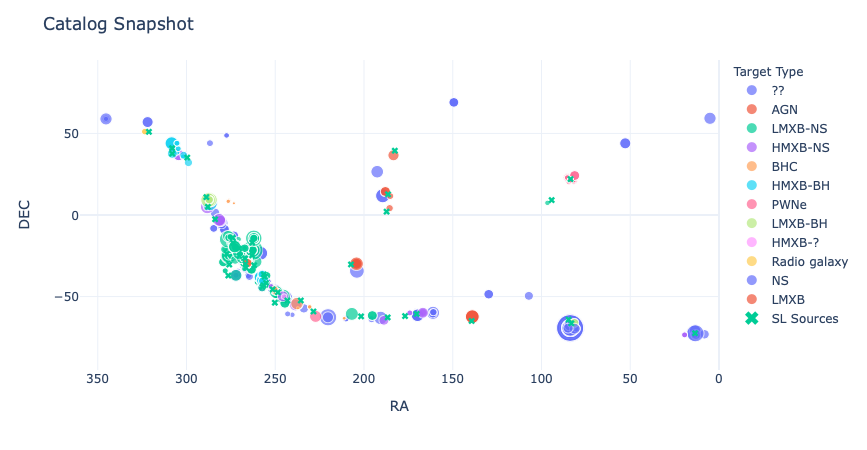

In [214]:

import plotly.express as px
import plotly.io as pio


fig = px.scatter(df, x='RA', y='DEC'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type')

fig.add_trace(go.Scatter(x=ra, y= dec,
                    mode='markers',
                    name='SL Sources',
                    text=names, marker_symbol='x'))




fig.update_layout(template='plotly_white')
fig.update_layout(title='Catalog Snapshot')

fig.update_layout(yaxis=dict(range=[-95,95]),xaxis=dict(range=[360, 0]))

fig.show()

pio.write_html(fig, file='straycat_radec.html')



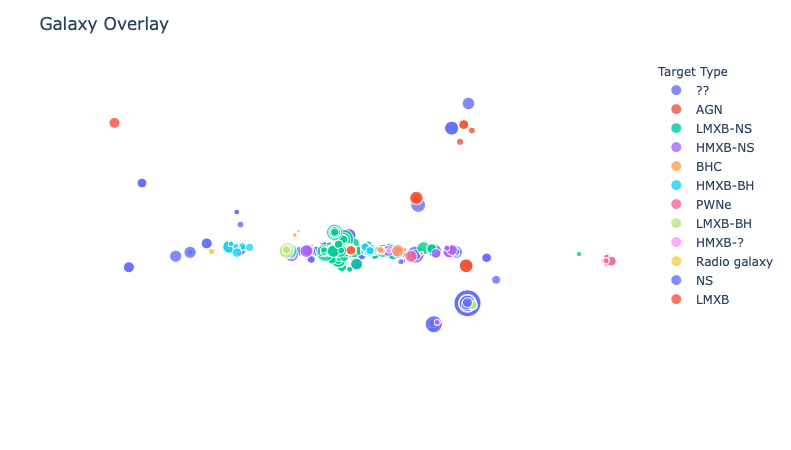

In [115]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5



scalex=scale_factor*img_width*( ( ( (360 - df['GalLon']) + 180) % 360) / 360)
scaley=0.5*scale_factor*img_height*(df['GalLat']/90) + 0.5*scale_factor*img_height

df['x'] = scalex
df['y'] = scaley


fig = px.scatter(df, x='x', y='y'
                 ,size='Exposure (s)'
                  , hover_data=['SL Target', 'Primary Target', 'Exposure (s)', 'Notes']
                  ,color= 'Target Type', opacity=0.8)
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)


fig.add_layout_image(
        dict(
            source="https://cdn.eso.org/images/large/eso0932a.jpg",
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=img_height * scale_factor,
            sizey=img_height * scale_factor,
            sizing="stretch",
            layer="below")
)


fig.update_layout(template='plotly_white')
fig.update_layout(title='Galaxy Overlay')


fig.show()


pio.write_html(fig, file='galaxy_overlay.html')


#By ESO/S. Brunier - http://www.eso.org/public/images/eso0932a/, CC BY 4.0, https://commons.wikimedia.org/w/index.php?curid=9559670

In [177]:
sl = df[df['Classification'] == 'SL'].copy().reset_index(drop=True)

In [178]:
targets = sl['SL Target'].unique()

In [179]:
from astroquery.simbad import Simbad

2MASX J09172716-6456271
3C 273
4U 0614+091
4U 1323-619
4U 1538-522
4U 1608-522
4U 1630-47
4U 1636-536
4U 1700-377
4U 1702-429
4U 1705-44
4U 1724-30
4U 1820-303
4U 1822-371
1E 1145.1-6141
Cen X-3
Crab
Crab GR
Cyg X-1
Cyg X-3
EXO 2030+375
Faint
GRS 1915+105
GS 1826-24
GX 1+4
GX 13+1
GX 17+2
GX 3+1
GX 301-2
GX 340+0
GX 349+2
GX 349+2?
GX 5-1
GX 9+1
GX 9+9
IC 4329A
IGR 16320-4751
IGR J16318-4848?


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




IGR J17464-3213
IGR J21247+5058


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




LMC source?
LMC X-3
LMC X-4
M1812-12


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




MAXI J1348
MAXI J1535


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




MAXI J1820


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




NGC 4151
NGC 4388
OAO 1657-415
PSR 1509-58
RX J0053.8-7226
SLX 1735-259
SLX 1744-299


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




SS 433
X1908+075


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:


/Users/bwgref/miniconda3/envs/nustar/lib/python3.7/site-packages/astroquery/simbad/core.py:138: UserWarning:




XTE J1550-564?
XTE J1855-026
